# Introduction to Zernike Polynomials

Zernike polynomials are a set of orthogonal polynomials that arise in the expansion of wavefront functions in optical systems. They are particularly useful in the field of optics and are widely used to describe wavefront aberrations. Named after the Dutch physicist Frits Zernike, these polynomials form a complete orthogonal set over the unit disk.

## Definition

A Zernike polynomial $Z_n^m(\rho, \theta)$ is defined in polar coordinates $(\rho, \theta)$, where $\rho$ is the radial coordinate (ranging from 0 to 1) and $\theta$ is the azimuthal angle (ranging from 0 to $2\pi$). The general form of a Zernike polynomial is given by:

$$
Z_n^m(\rho, \theta) = R_n^m(\rho) e^{im\theta}
$$

where $n$ and $m$ are integers with $n \geq 0$ and $|m| \leq n$, and $R_n^m(\rho)$ is the radial polynomial defined as:

$$
R_n^m(\rho) = \sum_{k=0}^{(n-|m|)/2} \frac{(-1)^k (n-k)!}{k! \left(\frac{n+|m|}{2} - k\right)! \left(\frac{n-|m|}{2} - k\right)!} \rho^{n-2k}
$$

## Properties

- **Orthogonality:** Zernike polynomials are orthogonal over the unit disk. This means that the integral of the product of two different Zernike polynomials over the unit disk is zero.
  
  $$
  \int_0^{2\pi} \int_0^1 Z_n^m(\rho, \theta) Z_{n'}^{m'}(\rho, \theta) \rho \, d\rho \, d\theta = \delta_{nn'} \delta_{mm'}
  $$

- **Completeness:** Any continuous function over the unit disk can be expanded as a series of Zernike polynomials.

- **Normalization:** The Zernike polynomials can be normalized so that their integral over the unit disk equals one.

## Applications

Zernike polynomials are extensively used in optical system design and analysis, particularly in wavefront sensing and correction. They help in decomposing wavefront errors into a series of orthogonal components, making it easier to understand and correct aberrations in optical systems.


## Visualization of ZPs

In [1]:
#%matplotlib qt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from stemplot import h_axes
from mtflearn import ZPs

In [23]:
import matplotlib.patches as patches

def generate_axes(axes, fig):
    n = len(axes)-1
    l = []
    for i in range(n):
        ax1, ax2 = axes[i], axes[i+1]
        box1, box2 = ax1.get_position(), ax2.get_position()
        w, h = box1.width, box1.height
        x1, y1 = box1.x0, box1.y0
        x2, y2 = box2.x0, box2.y0
        d = 0.13
        x, y = (x1+x2)/2, (y1+y2)/2 + d
        ax = fig.add_axes([x, y, w, h])
        l.append(ax)
    return l

def plot_img(ax, img, ss, **kwargs):
    im = ax.imshow(img, **kwargs)
    x = img.shape[0]/2
    patch = patches.Circle((x, x), radius=x-3, transform=ax.transData)
    im.set_clip_path(patch)
    ax.axis('off')
    ax.text(465, 480, ss, fontsize=14)

Text(0.12, 0.7953, '$-radial\\ index$')

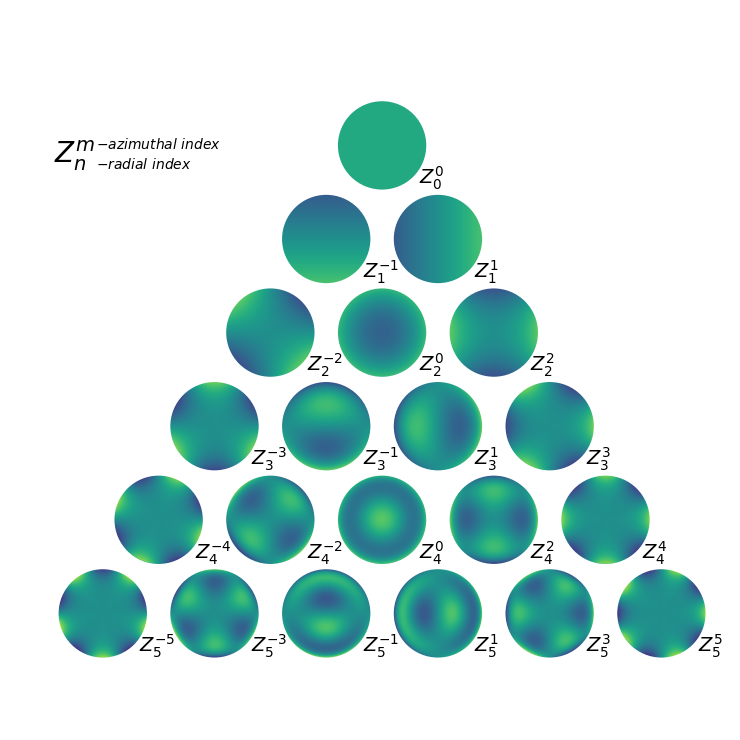

In [24]:
fig = plt.figure(figsize=(7.2, 7.2))

axes1 = h_axes(fig, n=6, bottom=0.1, left=1/15, right=1/30, wspace=0.25, ratios=1)
axes2 = generate_axes(axes1, fig)
axes3 = generate_axes(axes2, fig)
axes4 = generate_axes(axes3, fig)
axes5 = generate_axes(axes4, fig)
axes6 = generate_axes(axes5, fig)

axes = axes6 + axes5 + axes4 + axes3 + axes2 + list(axes1)


size = 512
zps = ZPs(n_max=10, size=size).polynomials

vmax = zps.max()
vmin = zps.min()

s = []
for i in np.arange(21):
    n = int(np.ceil((-3 + np.sqrt(9+8*i))/2))
    m = int(2*i-n*(n+2))
    string = r'$Z_'+r'{'+str(n)+r'}'+r'^{'+str(m)+r'}$'
    s.append(string)

for i in range(21):
    plot_img(axes[i], zps[i], ss=s[i], vmax=vmax, vmin=vmin)

ax = fig.add_axes([0, 0, 1, 1], facecolor=[0, 0, 0, 0])
ax.axis('off')

ax.text(x=0.0611, y=0.8217, s=r'$Z_{n}^{m}$', ha='left', va='top', fontsize=20)
ax.text(x=0.12, y=0.8231, s='$-azimuthal\ index$', ha='left', va='top')
ax.text(x=0.12, y=0.7953, s='$-radial\ index$', ha='left', va='top')

#Cursor(ax)